In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
from matplotlib.dates import DateFormatter

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df = pd.read_csv(dataset_url)

# Nova seção

# Nova seção

In [ ]:
df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date']) #definindo o tipo de dado da columna date

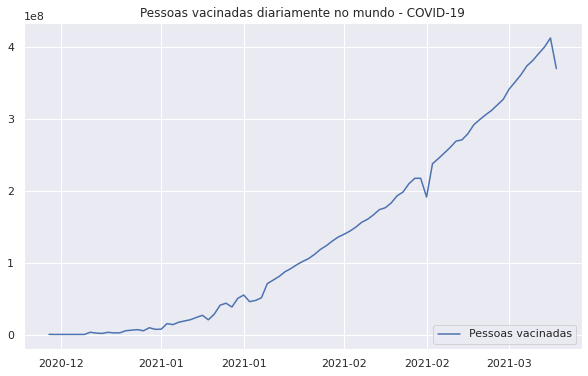

In [ ]:
gp_vaccinated_date = df.groupby('date', as_index=False)['people_vaccinated'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.plot(gp_vaccinated_date['date'], gp_vaccinated_date['people_vaccinated'])
plt.title("Pessoas vacinadas diariamente no mundo - COVID-19")
ax.legend(["Pessoas vacinadas"], loc='lower right')
plt.show()

In [ ]:
gp_countrie = df.groupby('location', as_index=False)['people_vaccinated'].sum()
gp_countrie.sort_values('people_vaccinated', ascending=False, axis=0, inplace=True) #ordenando por número de vacinas
gp_countrie = gp_countrie.drop(gp_countrie.index[0], axis=0) #removendo o valor 'World'
 
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(gp_countrie['location'].iloc[:10], gp_countrie['people_vaccinated'].iloc[:10])
ax.invert_yaxis()
plt.title("Ranking de vacinação - COVID-19")

NameError: ignored

In [ ]:
#Segmentando os dados brasileiros
df_brazil = df.loc[df['location'] == 'Brazil']
df_brazil.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
719,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
720,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0
721,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0
722,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0
723,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0


Text(0.5, 1.0, 'Vacinação brasileira COVID-19')

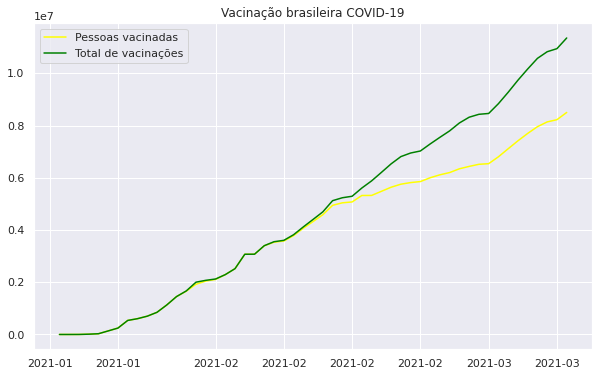

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.plot(df_brazil['date'], df_brazil['people_vaccinated'], color="yellow")
ax.plot(df_brazil['date'], df_brazil['total_vaccinations'], color="blue")
ax.legend(['Pessoas vacinadas','Total de vacinações'])
plt.title("Vacinação brasileira - COVID-19")